In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data=pd.DataFrame(pd.read_json('https://api.apispreadsheets.com/api/dataset/school-grades/',orient='split'))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


C:\Users\mateu\anaconda3\Installed14_03\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


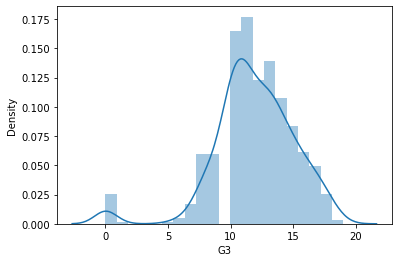

Skośność: -0.9129093547157225
Kurtoza: 2.7122043191041723


In [6]:
sns.distplot(data['G3'])
plt.show()
print(f'Skośność: {data["G3"].skew()}')
print(f'Kurtoza: {data["G3"].kurt()}')


In [7]:
df=data.iloc[:,[25,26,27]]

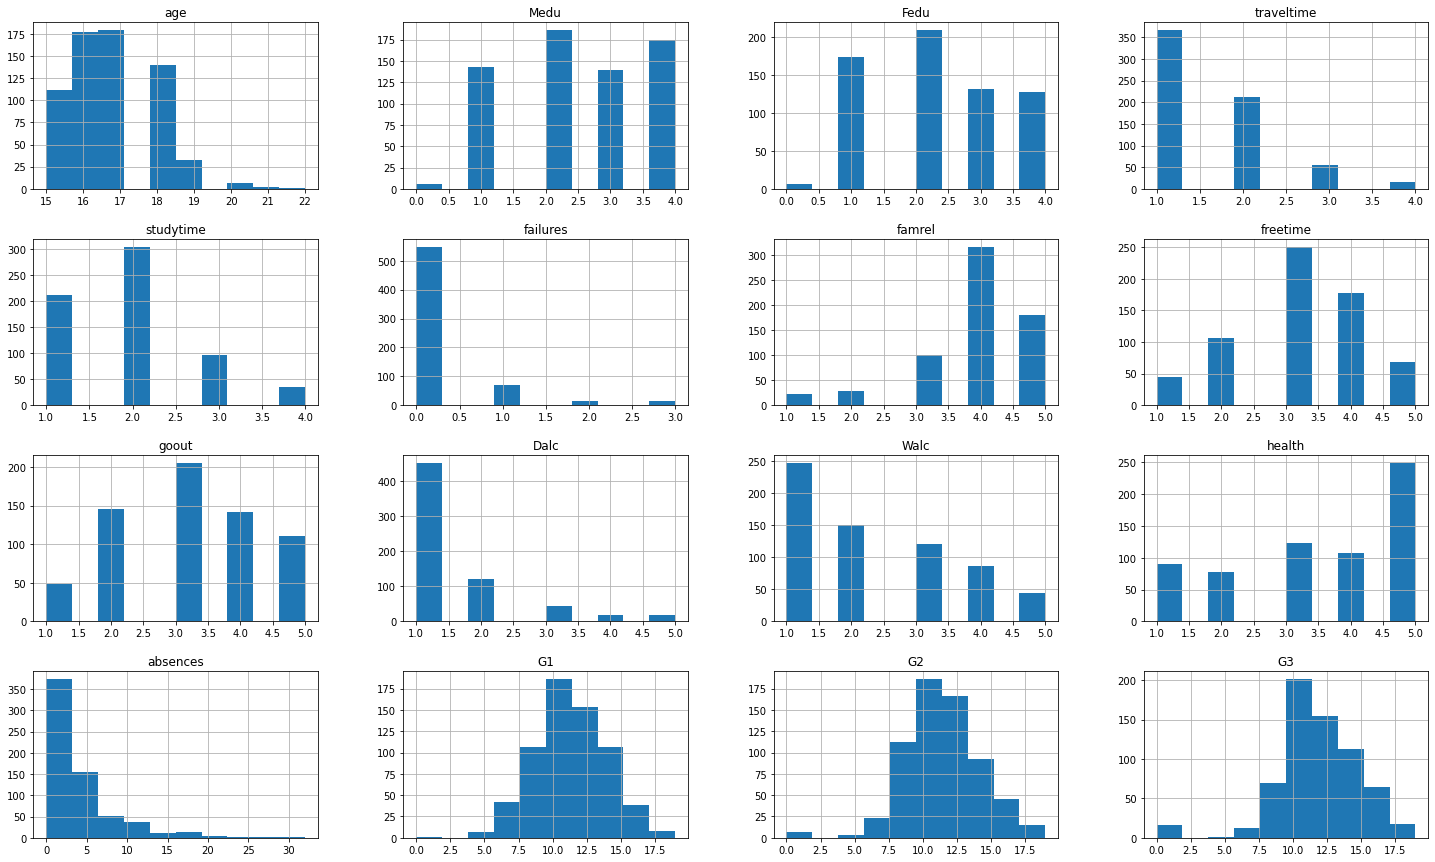

In [8]:

data.hist(figsize=(25,15))
plt.show()

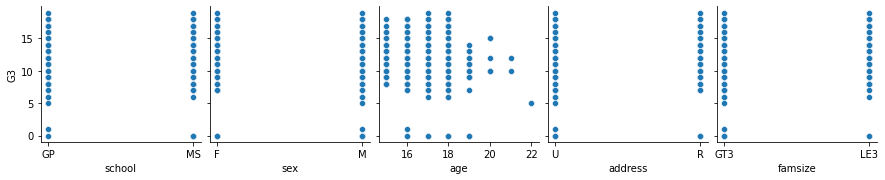

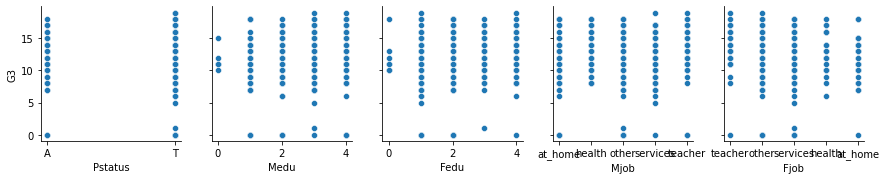

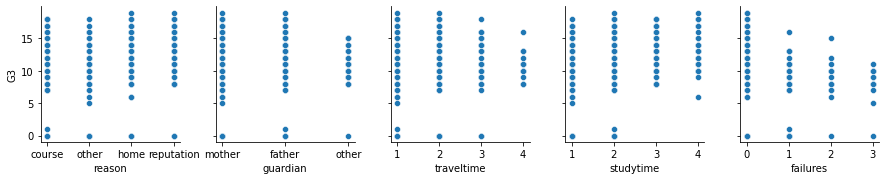

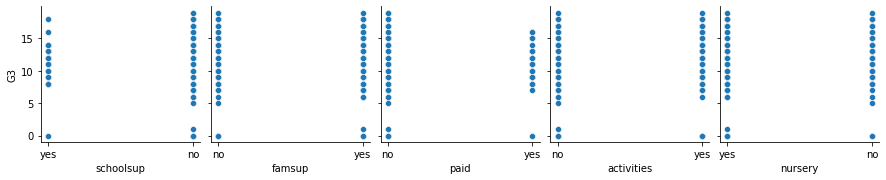

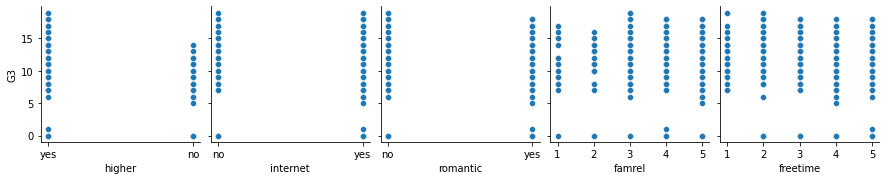

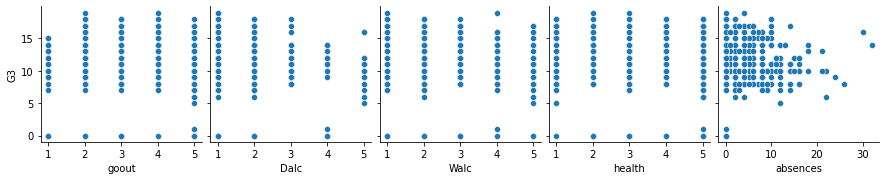

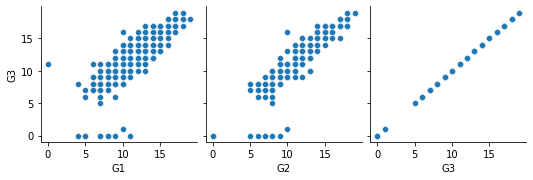

In [9]:
sns.pairplot(data=data,y_vars='G3',x_vars=data.columns.values[:5],diag_kind = None)
sns.pairplot(data=data,y_vars='G3',x_vars=data.columns.values[5:10],diag_kind = None)
sns.pairplot(data=data,y_vars='G3',x_vars=data.columns.values[10:15],diag_kind = None)
sns.pairplot(data=data,y_vars='G3',x_vars=data.columns.values[15:20],diag_kind = None)
sns.pairplot(data=data,y_vars='G3',x_vars=data.columns.values[20:25],diag_kind = None)
sns.pairplot(data=data,y_vars='G3',x_vars=data.columns.values[25:30],diag_kind = None)
sns.pairplot(data=data,y_vars='G3',x_vars=data.columns.values[30:],diag_kind = None)

<AxesSubplot:>

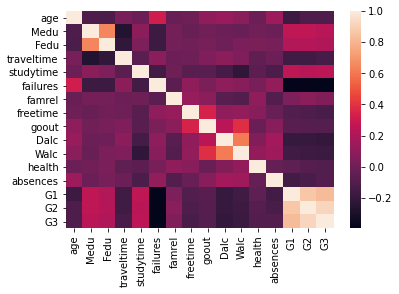

In [10]:
sns.heatmap(data.corr())

In [37]:
df=data.drop('G2',axis=1)
df=df.drop('G1',axis=1)
df.corr().nlargest(20,'G3')['G3']

G3            1.000000
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64

In [12]:
df.corr().nsmallest(5,'G3')['G3']

failures     -0.393316
Dalc         -0.204719
Walc         -0.176619
traveltime   -0.127173
freetime     -0.122705
Name: G3, dtype: float64

In [13]:
nonzero=df[(df['G3']>0)]

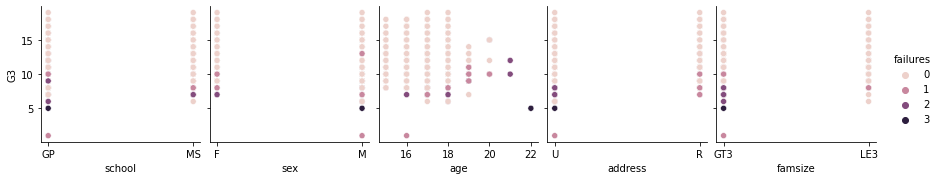

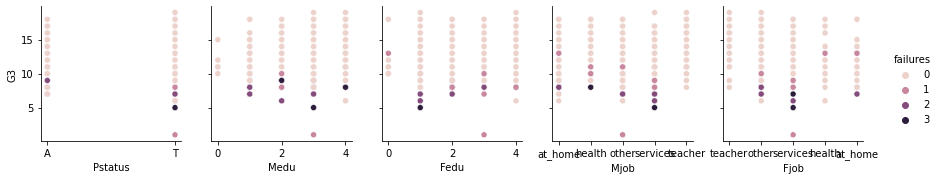

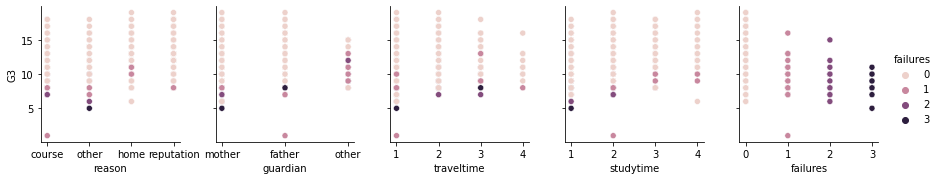

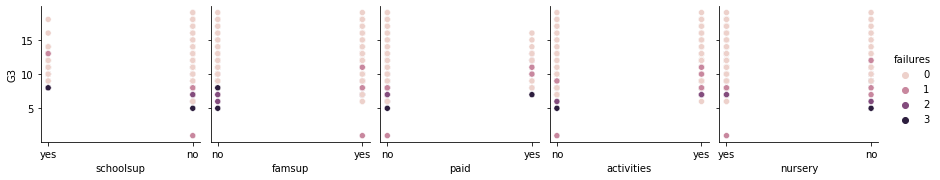

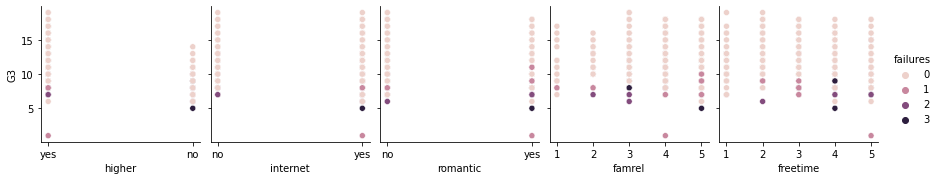

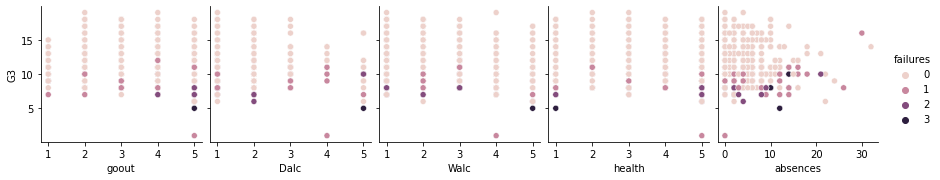

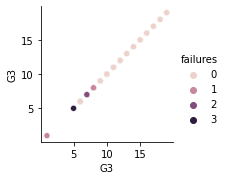

In [14]:
sns.pairplot(data=nonzero,y_vars='G3',x_vars=nonzero.columns.values[:5],diag_kind = None, hue="failures")
sns.pairplot(data=nonzero,y_vars='G3',x_vars=nonzero.columns.values[5:10],diag_kind = None, hue="failures")
sns.pairplot(data=nonzero,y_vars='G3',x_vars=nonzero.columns.values[10:15],diag_kind = None, hue="failures")
sns.pairplot(data=nonzero,y_vars='G3',x_vars=nonzero.columns.values[15:20],diag_kind = None, hue="failures")
sns.pairplot(data=nonzero,y_vars='G3',x_vars=nonzero.columns.values[20:25],diag_kind = None, hue="failures")
sns.pairplot(data=nonzero,y_vars='G3',x_vars=nonzero.columns.values[25:30],diag_kind = None, hue="failures")
sns.pairplot(data=nonzero,y_vars='G3',x_vars=nonzero.columns.values[30:],diag_kind = None, hue="failures")

<AxesSubplot:xlabel='absences', ylabel='studytime'>

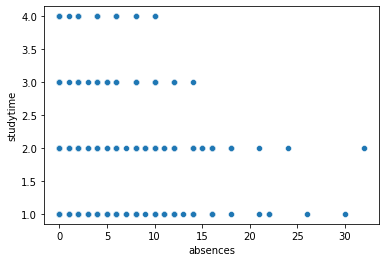

In [15]:
sns.scatterplot(data=df, x="absences",y="studytime")

In [18]:
df1=df[(df['G3']<=3)]
df2=df[(df['G3']>3)]

C:\Users\mateu\anaconda3\Installed14_03\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='G3', ylabel='Density'>

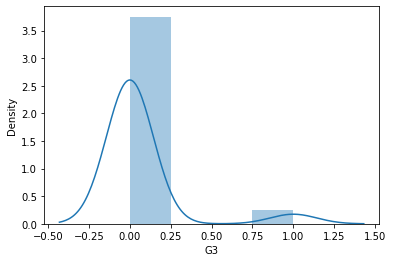

In [21]:
sns.distplot(df1['G3'])

C:\Users\mateu\anaconda3\Installed14_03\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='G3', ylabel='Density'>

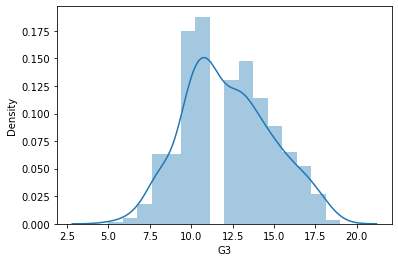

In [20]:
sns.distplot(df2['G3'])

<AxesSubplot:>

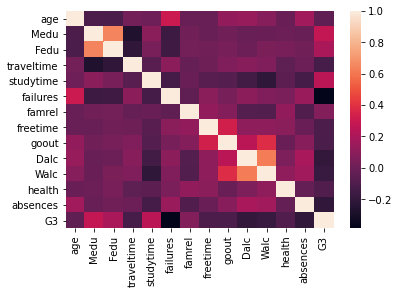

In [22]:
sns.heatmap(df2.corr())

In [25]:

df2.corr().nsmallest(5,'G3')['G3']

failures     -0.384569
absences     -0.204230
Dalc         -0.196891
Walc         -0.178839
traveltime   -0.129654
Name: G3, dtype: float64

In [26]:
df2.corr().nlargest(5,'G3')['G3']

G3           1.000000
Medu         0.278690
studytime    0.249855
Fedu         0.204392
famrel       0.072888
Name: G3, dtype: float64

<AxesSubplot:>

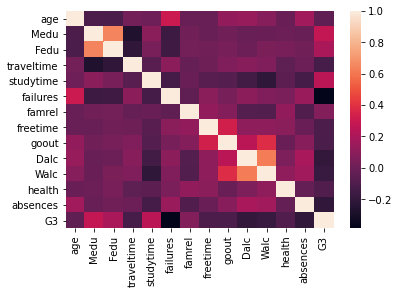

In [28]:
sns.heatmap(df2.corr())

G3          1.000000
Dalc        0.421637
Fedu        0.389249
freetime    0.319546
goout       0.287354
Name: G3, dtype: float64

age          -0.443578
traveltime   -0.292770
famrel        0.025441
failures      0.059940
Medu          0.153356
Name: G3, dtype: float64

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,test1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,10,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,16,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,9,1
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,1


<AxesSubplot:>

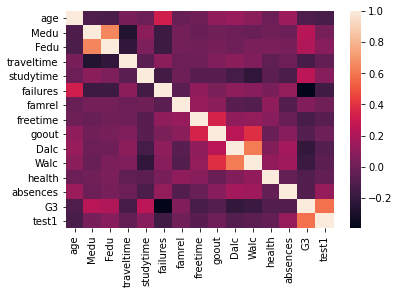

failures   -0.158407
age        -0.123207
Dalc       -0.085622
freetime   -0.067320
Walc       -0.058170
Name: test1, dtype: float64
test1        1.000000
G3           0.583287
absences     0.125465
studytime    0.082605
Fedu         0.080518
Name: test1, dtype: float64
